# Is programmer job woman friendly? 
**Business Understanding**

I myself, as a woman from Asia and plan to start my career in the field of data science. I have several questions in my mind based on the Stack Overflow survey data as follow.


*   Does woman make less money than man?
*   Does women satisfy their job as man?
*   Which contury offer woman high salary? 

**Data Understanding**

First, we take a look at the data. 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [35]:
df = pd.read_csv('survey-results-public.csv')
df.head();
df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

Text(0.5, 1.0, 'Gender')

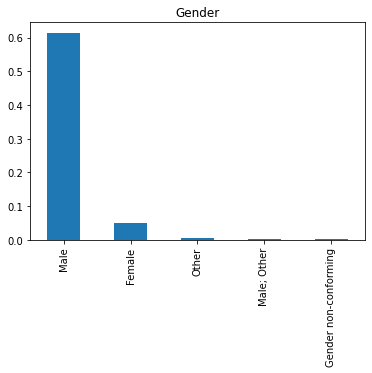

In [42]:
gener = df['Gender'].value_counts()
(gener[:5]/df.shape[0]).plot(kind='bar');
plt.title('Gender')

Text(0.5, 1.0, 'JobSatisfaction')

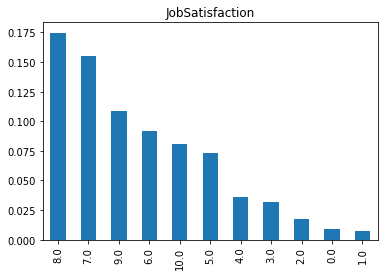

In [38]:
sati=df['JobSatisfaction'].value_counts()
(sati[:]/df.shape[0]).plot(kind='bar');
plt.title('JobSatisfaction')

Text(0.5, 1.0, 'Country')

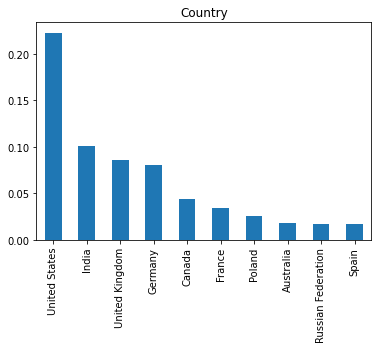

In [40]:
cont=df['Country'].value_counts()
(cont[:10]/df.shape[0]).plot(kind='bar');
plt.title('Country')

**Data preparation**

First, I will group the gender into three group: male, female and other.

In [0]:
def divide_gender(df):
  # Return a datafram with gender separate into man, woman and other
  # Input: a raw dataframe
  # Output: a dataframe with a new column man, woman and other
  man = ['Male']
  woman = ['Female']
  df['man_or_woman'] = df['Gender'].apply(lambda x: 'man' if x in man else ('woman' if x in woman else 'other'))
  return df

In [0]:
def handling_country(df):
    #Return a dataframe with the first 10 country 
    #input: a raw data dataframe
    #output: a dataframe with a new column the first 10 country

    american = ['United States', 'Canada']
    asia = ['India']
    uk = ['United Kingdom']
    euro = ['Germany','France','Spain', 'Poland','Russian Federation']
    aus = ['Austrialia']
    
    #Add a new catagory seperating to western and eastern
    df['first_or_other'] = df['Country'].apply(lambda x: 'american' if x in american else ('asia' if x in asia else ('aus' if x in aus else ('euro' if x in euro else('uk' if x in uk else 'other')))))
    return df

Then, we filter the unnecessary data and get the needed information. 

In [0]:
def data_preparation(df):
    
    #Return useful columns with query condition
    #input: a raw data dataframe
    #output: a filtered dataframe with only needed columns
    columns_needed = ['Country','first_or_other','man_or_woman','YearsCodedJob', 'EmploymentStatus', 'CareerSatisfaction', 'JobSatisfaction', 'HoursPerWeek', 'Salary']
    filtered = pd.DataFrame(df)[columns_needed]
    return filtered

In [163]:
df = divide_gender(df)
df = handling_country(df)
useful_df = data_preparation(df)
useful_df.head()

,Country,first_or_other,man_or_woman,YearsCodedJob,EmploymentStatus,CareerSatisfaction,JobSatisfaction,HoursPerWeek,Salary
0,United States,american,man,NaN,"Not employed, and not looking for work",NaN,NaN,0.0,NaN
1,United Kingdom,uk,man,NaN,Employed part-time,NaN,NaN,NaN,NaN
2,United Kingdom,uk,man,20 or more years,Employed full-time,8.0,9.0,NaN,113750.0
3,United States,american,man,9 to 10 years,Employed full-time,6.0,3.0,5.0,NaN
4,Switzerland,other,other,10 to 11 years,Employed full-time,6.0,8.0,NaN,NaN


Divide the category factor 'years of code' into numerical data 

In [0]:
def jobexperience(df):    
    #Convert category to  for calculating the mean  
    #Input: a categorical dataframe that will be converted to numeric dataframe
    #Output: a converted dataframe with YearsCodedJob column becomes measurable

    year_map = {'1 to 2 years' : 1, 
                '10 to 11 years' : 10, 
                '11 to 12 years' : 11, 
                '12 to 13 years' : 12,
                '13 to 14 years' : 13, 
                '14 to 15 years' : 14, 
                '15 to 16 years' : 15, 
                '16 to 17 years' : 16,
                '17 to 18 years' : 17, 
                '18 to 19 years' : 18, 
                '19 to 20 years' : 19, 
                '2 to 3 years' : 2,
                '20 or more years' : 20, 
                '3 to 4 years' : 3, 
                '4 to 5 years' : 4, 
                '5 to 6 years' : 5, 
                '6 to 7 years' : 6, 
                '7 to 8 years' : 7, 
                '8 to 9 years' : 8, 
                '9 to 10 years' : 9, 
                'Less than a year' : 0}
    
    df_graph = df.reset_index()
    df_graph['YearsCodedJob'] = df_graph['YearsCodedJob'].apply(lambda x: year_map[x])
    df_graph['YearsCodedJob'] = pd.to_numeric(df_graph['YearsCodedJob'])
    return df_graph

In [164]:
comparison = useful_df.groupby(['man_or_woman','YearsCodedJob']).mean()
comparison

CareerSatisfaction  ...        Salary
man_or_woman YearsCodedJob                         ...              
man          1 to 2 years                7.257056  ...  32878.414424
             10 to 11 years              7.485114  ...  67241.182522
             11 to 12 years              7.481848  ...  71447.122672
             12 to 13 years              7.505597  ...  83338.636797
             13 to 14 years              7.508906  ...  76924.368403
...                                           ...  ...           ...
woman        6 to 7 years                7.262136  ...  65506.720452
             7 to 8 years                6.973684  ...  65896.225425
             8 to 9 years                7.300000  ...  67654.873063
             9 to 10 years               7.500000  ...  60365.170624
             Less than a year            6.921053  ...  41856.369708

[63 rows x 4 columns]

In [154]:
comparison_graph = jobexperience(comparison)
comparison_graph = comparison_graph.sort_values(by='YearsCodedJob')
comparison_graph

,man_or_woman,YearsCodedJob,CareerSatisfaction,JobSatisfaction,HoursPerWeek,Salary
62,woman,0,6.921053,6.953271,4.546392,41856.369708
41,other,0,6.813717,6.704903,6.307453,28393.262019
20,man,0,7.127619,7.014334,3.738620,33149.316707
42,woman,1,7.270950,6.806818,3.389831,46109.787583
21,other,1,6.959665,6.596315,6.876897,31831.156999
...,...,...,...,...,...,...
10,man,19,7.607717,7.114754,2.727941,87468.852280
31,other,19,7.440000,7.265306,2.406250,96847.643098
54,woman,20,7.280702,7.027027,3.220000,110212.488936
12,man,20,7.815927,7.375391,2.772277,97519.109697


In [165]:
# data for woman only

woman = useful_df[useful_df['man_or_woman']=='woman']
woman

,Country,first_or_other,man_or_woman,YearsCodedJob,EmploymentStatus,CareerSatisfaction,JobSatisfaction,HoursPerWeek,Salary
10,United States,american,woman,11 to 12 years,Employed full-time,8.0,9.0,NaN,NaN
13,Germany,euro,woman,15 to 16 years,Employed full-time,8.0,6.0,3.0,NaN
103,United States,american,woman,1 to 2 years,Employed full-time,10.0,10.0,NaN,51000.000000
165,Germany,euro,woman,8 to 9 years,Employed full-time,7.0,9.0,NaN,NaN
214,Germany,euro,woman,4 to 5 years,Employed full-time,5.0,3.0,NaN,51612.903226
...,...,...,...,...,...,...,...,...,...
51321,Malaysia,other,woman,NaN,"Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN
51345,United Kingdom,uk,woman,20 or more years,Employed full-time,8.0,5.0,1.0,NaN
51356,Portugal,other,woman,1 to 2 years,Employed full-time,8.0,2.0,3.0,15483.870968
51367,Spain,euro,woman,NaN,Employed part-time,NaN,NaN,1.0,NaN


In [174]:
comparison2 = woman.groupby(['first_or_other','YearsCodedJob']).mean()
comparison_graph2 = jobexperience(comparison2)
comparison_graph2 = comparison_graph2.sort_values(by='YearsCodedJob')
comparison_graph2

,first_or_other,YearsCodedJob,CareerSatisfaction,JobSatisfaction,HoursPerWeek,Salary
94,uk,0,7.571429,7.692308,2.571429,30675.000000
73,other,0,6.857143,7.015625,4.870968,18219.997432
52,euro,0,7.033333,7.827586,2.100000,20405.763513
32,asia,0,4.972973,4.971429,5.478261,2011.470416
20,american,0,7.753247,7.369863,4.807692,63479.713805
...,...,...,...,...,...,...
42,euro,19,7.000000,7.000000,NaN,53763.440860
44,euro,20,7.250000,6.750000,0.500000,NaN
12,american,20,7.275000,6.897436,3.552632,116812.737013
86,uk,20,7.272727,7.636364,1.000000,52812.500000


**Results Evaluation**

Question 1: what is the salary difference between man and woman?

In [0]:
comparison_graph.set_index(comparison_graph['YearsCodedJob'], inplace=True)

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 <a list of 11 Text major ticklabel objects>)

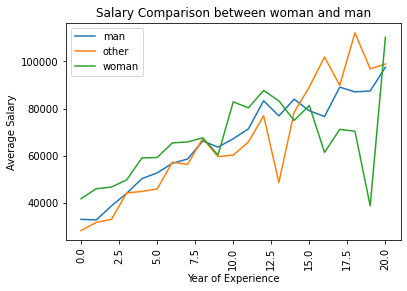

In [130]:
comparison_graph.groupby('man_or_woman')['Salary'].plot(legend=True)
plt.title("Salary Comparison between woman and man");
plt.xlabel('Year of Experience')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)

**Question 2: Does women satisfy their job as man?**

In [182]:
comparison_graph.groupby('man_or_woman').mean().CareerSatisfaction

man_or_woman
man      7.467491
other    7.299948
woman    7.226931
Name: CareerSatisfaction, dtype: float64

In [183]:
comparison_graph.groupby('man_or_woman').mean().JobSatisfaction

man_or_woman
man      7.065211
other    6.991607
woman    7.003269
Name: JobSatisfaction, dtype: float64

In [184]:
comparison_graph.groupby('man_or_woman').mean().Salary/50

man_or_woman
man      1331.003288
other    1322.345800
woman    1338.302131
Name: Salary, dtype: float64

Text(0, 0.5, 'Job Satisfaction')

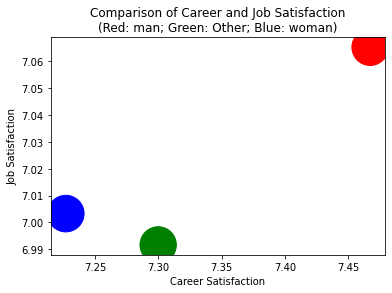

In [185]:
plt.scatter(comparison.groupby('man_or_woman').mean().CareerSatisfaction, comparison.groupby('man_or_woman').mean().JobSatisfaction, comparison.groupby('man_or_woman').mean().Salary/50, c=['red','green','blue'])
plt.title('Comparison of Career and Job Satisfaction\n(Red: man; Green: Other; Blue: woman)')
plt.xlabel('Career Satisfaction')
plt.ylabel('Job Satisfaction')

**Question 3: which country offer woman higher salary?**

Text(0, 0.5, 'Average Salary')

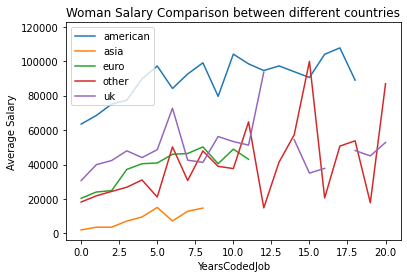

In [181]:
comparison_graph2.set_index(comparison_graph2['YearsCodedJob'], inplace=True)
comparison_graph2.groupby('first_or_other')['Salary'].plot(legend=True)
plt.title("Woman Salary Comparison between different countries");
plt.xlabel('YearsCodedJob')
plt.ylabel('Average Salary')

# Conclusion


Overall, based on the survey in 2017 from Stack Overflow, there are much less women as a programmer than men. That is, ~60% men working as a programmer compared with only ~0.6% women. Other answers to the three questions are as follows. 
*   Salary for the first 15 years, there is no big difference between man and woman. But after 15 years, man's salary is higher than woman. 
*   Men feels more statisfied with their job and career compared with women. 
*   US provides the highest salary for women. UK, Europe and other countries offer similar salary. Asia provided the least salary. This conclusion might be doubtful becauce the lack of data for Asia woman programmers. 


